<a href="https://colab.research.google.com/github/CarlosLopes88/05_Classication_models/blob/main/MLP_classifier_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETL / EDA

Processo de importação das bibliotécas:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1º Passo Extração dos dados:

In [ ]:
df = pd.read_csv("sensor.csv")

df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


Analise de colunas e número de linhas da base de dados:

In [ ]:
df.shape

(61646, 55)

Verificação dos nomes das colunas:

In [ ]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

Ánalise do tipo de dados contidos na base de dados:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61646 entries, 0 to 61645
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      61646 non-null  int64  
 1   timestamp       61646 non-null  object 
 2   sensor_00       57619 non-null  float64
 3   sensor_01       61582 non-null  float64
 4   sensor_02       61637 non-null  float64
 5   sensor_03       61637 non-null  float64
 6   sensor_04       61637 non-null  float64
 7   sensor_05       61637 non-null  float64
 8   sensor_06       61400 non-null  float64
 9   sensor_07       61442 non-null  float64
 10  sensor_08       60936 non-null  float64
 11  sensor_09       61637 non-null  float64
 12  sensor_10       61637 non-null  float64
 13  sensor_11       61637 non-null  float64
 14  sensor_12       61637 non-null  float64
 15  sensor_13       61637 non-null  float64
 16  sensor_14       61636 non-null  float64
 17  sensor_15       0 non-null     

2º Passo transformação:

Renomear a colunas timestamp para 'data' e ajustas o formato. 

In [ ]:
df = df.rename(columns={'timestamp':'data'})

df['data'] = df['data'].str.slice(stop=10)

df['data'] = df['data'].astype('datetime64[D]')

df.head()

,Unnamed: 0,data,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


Armazenando a base limpa:

In [ ]:
df.to_csv("sensor_limpa.csv", index = False)

Vericação de dados nulos contidos na base:

In [ ]:
for column in df.columns.values.tolist():
  total = df[column].isna().sum()
  if total > 1:
    print(column, "\t NaN = ",total)
    

sensor_00 	 NaN =  4027
sensor_01 	 NaN =  64
sensor_02 	 NaN =  9
sensor_03 	 NaN =  9
sensor_04 	 NaN =  9
sensor_05 	 NaN =  9
sensor_06 	 NaN =  246
sensor_07 	 NaN =  204
sensor_08 	 NaN =  710
sensor_09 	 NaN =  9
sensor_10 	 NaN =  9
sensor_11 	 NaN =  9
sensor_12 	 NaN =  9
sensor_13 	 NaN =  9
sensor_14 	 NaN =  10
sensor_15 	 NaN =  61646
sensor_16 	 NaN =  10
sensor_17 	 NaN =  10
sensor_18 	 NaN =  10
sensor_19 	 NaN =  10
sensor_20 	 NaN =  10
sensor_21 	 NaN =  10
sensor_22 	 NaN =  10
sensor_23 	 NaN =  10
sensor_24 	 NaN =  10
sensor_25 	 NaN =  10
sensor_26 	 NaN =  10
sensor_27 	 NaN =  10
sensor_28 	 NaN =  10
sensor_29 	 NaN =  10
sensor_30 	 NaN =  255
sensor_31 	 NaN =  10
sensor_32 	 NaN =  10
sensor_33 	 NaN =  10
sensor_34 	 NaN =  10
sensor_35 	 NaN =  10
sensor_36 	 NaN =  10
sensor_37 	 NaN =  10
sensor_38 	 NaN =  9
sensor_39 	 NaN =  9
sensor_40 	 NaN =  9
sensor_41 	 NaN =  9
sensor_42 	 NaN =  9
sensor_43 	 NaN =  9
sensor_44 	 NaN =  9
sensor_45 	 NaN =

Retirada das colunas "unnamed 0" e "sensor_15" da base junto com os dados nulos:

In [ ]:
df = df.drop(columns=['Unnamed: 0','sensor_15'],axis=1)

df = df.dropna()

df.head()

,data,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


Separação da variável resposta das váriaveis independentes:

In [ ]:
y = df['machine_status']

X = df.drop(columns=['data','machine_status'],axis=1)

In [ ]:
y.head()

0    NORMAL
1    NORMAL
2    NORMAL
3    NORMAL
4    NORMAL
Name: machine_status, dtype: object

In [ ]:
X.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889


# Aplicação de StandardScaler e PCA

Normalização dos dados através da função Standard Scaler:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

Aplicação do método PCA:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(57341, 51)
(57341, 2)


Avaliação dos primeiros 20 parâmetros:

(57341, 20)
[0.38102778 0.14082649 0.10391849 0.05420113 0.03662046 0.03012663
 0.02531495 0.02370028 0.01998684 0.017311   0.01608763 0.01484548
 0.01362131 0.01227666 0.01178608 0.00963636 0.00805056 0.00759824
 0.00722705 0.00699684]
['PC01', 'PC02', 'PC03', 'PC04', 'PC05', 'PC06', 'PC07', 'PC08', 'PC09', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']


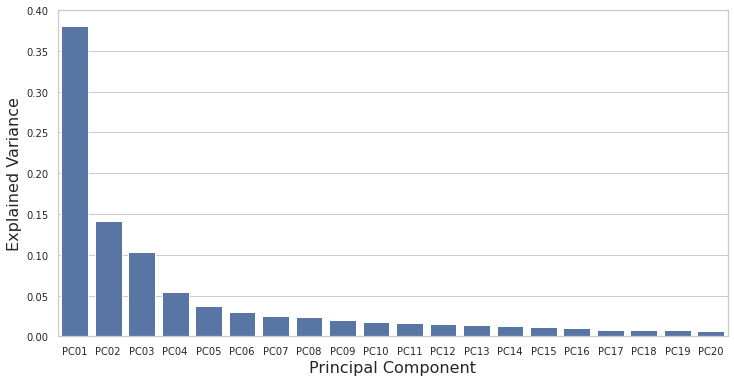

In [ ]:
nPCA = 20

pcaAll = PCA(n_components = nPCA)
pcaAll.fit(scaled_data)
x_pca_All = pcaAll.transform(scaled_data)
print(x_pca_All.shape)
print(pcaAll.explained_variance_ratio_)

pc_names= []

for i in range(nPCA):
    pc_names.append("PC%0.2d" % (i+1))
    
print(pc_names)
    
    
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,6))
ax = sns.barplot(x=pc_names, y=pcaAll.explained_variance_ratio_, color='b')
plt.tick_params(labelsize=10)
plt.xlabel('Principal Component', size = 16)
plt.ylabel('Explained Variance', size = 16)
plt.show()

Seleção das variáveis mais importantes:

In [ ]:
nPCA = 8

pca10 = PCA(n_components = nPCA)
pca10.fit(scaled_data)
x_pca_aj = pca10.transform(scaled_data)
print(x_pca_aj.shape)

(57341, 8)


['PC01', 'PC02', 'PC03', 'PC04', 'PC05', 'PC06', 'PC07', 'PC08']


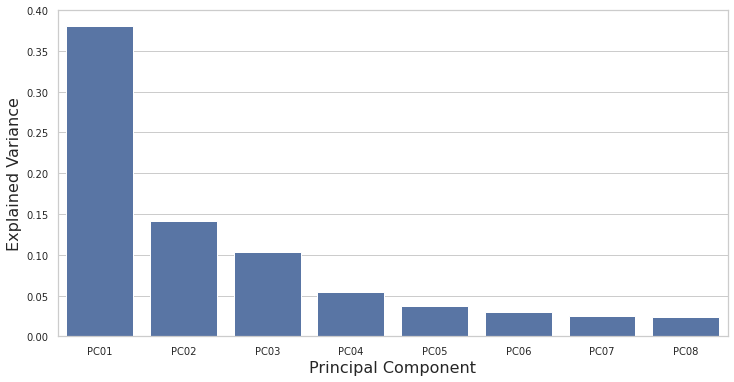

In [ ]:
pc_names= []

for i in range(nPCA):
    pc_names.append("PC%.2d" % (i+1))
    
print(pc_names)
    
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12,6))
ax = sns.barplot(x=pc_names, y=pca10.explained_variance_ratio_, color='b')
plt.tick_params(labelsize=10)
plt.xlabel('Principal Component', size = 16)
plt.ylabel('Explained Variance', size = 16)
plt.show()


In [ ]:
X_pca = pca10.transform(scaled_data)
X_pca = pd.DataFrame(X_pca, columns = pc_names)

print(X_pca.shape)

X_pca.head()

(57341, 8)


,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08
0,-2.113977,-1.321047,-0.678069,-2.134494,0.129500,0.000334,-1.315662,-0.729263
1,-2.113977,-1.321047,-0.678069,-2.134494,0.129500,0.000334,-1.315662,-0.729263
2,-2.238225,-1.292536,-0.660798,-2.184845,-0.014244,0.056511,-1.357861,-0.710729
3,-2.263998,-1.508815,-0.633439,-1.913930,0.009710,-0.056513,-1.381917,-0.784948
4,-2.203656,-1.602021,-0.469888,-1.886218,0.202713,-0.002044,-1.276636,-0.824185


# Analise com todo o data frame:


# Separação entre treino e teste para o modelo ( 70% dos dados para treino / 30 % para teste)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

print("Tamanho do Conjunto de Treino: ",X_train.shape,"| Tamanho do Conjunto de Teste",X_test.shape)
print("Amostra da Tabela de Treino")


Tamanho do Conjunto de Treino:  (40138, 51) | Tamanho do Conjunto de Teste (17203, 51)
Amostra da Tabela de Treino


# Implementação do modelo de rede neural multilayer perceptron classifier:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
mlp = MLPClassifier(alpha=1, max_iter=100)

In [ ]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1, max_iter=100)

In [ ]:
y_pred_mlp = mlp.predict(X_test)

print("Accuracy MLP:", metrics.accuracy_score(y_test, y_pred_mlp))

Accuracy MLP: 0.9994768354356798


Accuracy MLP: 0.9994768354356798


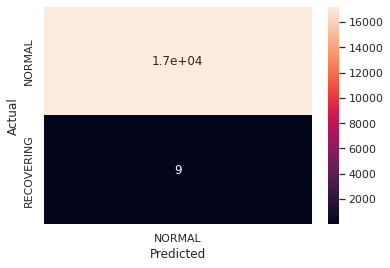

In [ ]:
print("Accuracy MLP:", metrics.accuracy_score(y_test, y_pred_mlp))
confusion_matrix = pd.crosstab(y_test, y_pred_mlp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Analise aplicando PCA:

Neste ponto com apenas as 8 variáveis mais importantes identificadas nas etapas anteriores:

# Separação entre treino e teste para o modelo ( 70% dos dados para treino / 30 % para teste)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=12)

print("Tamanho do Conjunto de Treino: ",X_train_pca.shape,"| Tamanho do Conjunto de Teste",X_test_pca.shape)
print("Amostra da Tabela de Treino")


Tamanho do Conjunto de Treino:  (40138, 8) | Tamanho do Conjunto de Teste (17203, 8)
Amostra da Tabela de Treino


# Implementação do modelo de rede neural multilayer perceptron classifier:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
mlp = MLPClassifier(alpha=1, max_iter=100)

In [ ]:
mlp.fit(X_train_pca, y_train)

MLPClassifier(alpha=1, max_iter=100)

In [ ]:
y_pred_mlp = mlp.predict(X_test_pca)

print("Accuracy MLP:", metrics.accuracy_score(y_test, y_pred_mlp))

Accuracy MLP: 0.9994768354356798


Accuracy MLP: 0.9994768354356798


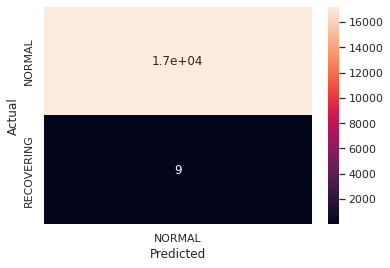

In [ ]:
print("Accuracy MLP:", metrics.accuracy_score(y_test, y_pred_mlp))
confusion_matrix = pd.crosstab(y_test, y_pred_mlp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)